In [4]:
import fiftyone as fo

#name = "my-dataset"
#data_path = "./data/JPEGImages"
#labels_path = "./data/Annotations/"

#dataset = fo.Dataset.from_dir(
#    dataset_type=fo.types.VOCDetectionDataset,
#    data_path=data_path,
#    labels_path=labels_path,
#    name=name,
#)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import fiftyone as fo

dataset = fo.load_dataset("my-dataset")

In [4]:
print(dataset)

Name:        my-dataset
Media type:  image
Num samples: 33793
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [5]:
labels = dataset.values("ground_truth.detections.label")

In [6]:
# The annoation data for the first image
dataset.values("ground_truth")[0]

<Detections: {
    'detections': [
        <Detection: {
            'id': '67d5cf85396b955f033a2647',
            'attributes': {},
            'tags': [],
            'label': 'Battery',
            'bounding_box': [
                0.46,
                0.3466666666666667,
                0.043333333333333335,
                0.14666666666666667,
            ],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'occluded': 0,
            'truncated': 0,
            'track_id': 0,
            'keyframe': True,
            'pose': 'Unspecified',
            'difficult': 0,
        }>,
    ],
}>

In [7]:
all_labels = [label[0] for label in labels]

In [8]:
from collections import Counter

In [9]:
label_counter = Counter(all_labels)

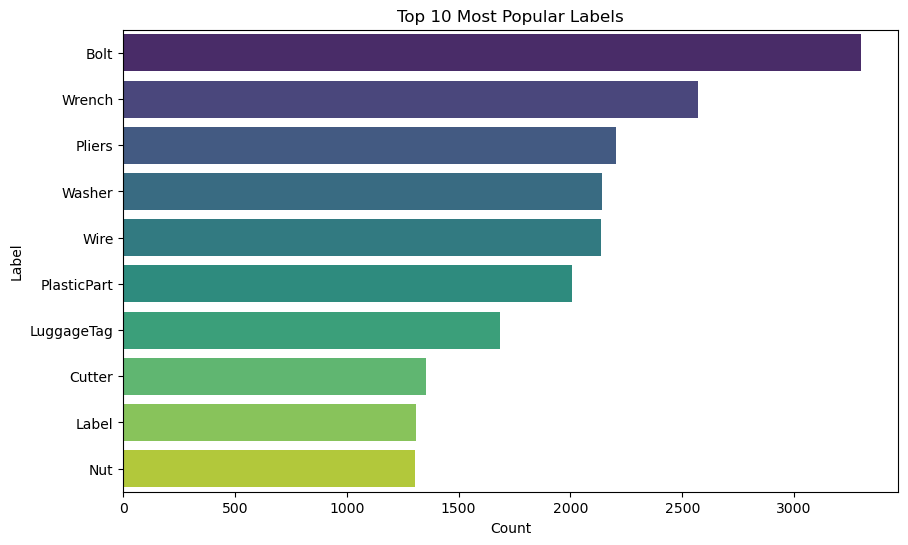

In [10]:
top_10 = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)[:10]

labels, counts = zip(*top_10)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels), palette="viridis", hue=list(labels), legend=False)

plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Top 10 Most Popular Labels")
plt.show()

In [11]:
# Bounding box of the first observation
dataset.values("ground_truth.detections.bounding_box")[0]

[[0.46, 0.3466666666666667, 0.043333333333333335, 0.14666666666666667]]

In [13]:
session = fo.launch_app(dataset)